In [1]:
VERSION = "20200707" #"nightly"  #"20200515" @param ["1.5" , "20200325", "nightly"]
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4994  100  4994    0     0  29726      0 --:--:-- --:--:-- --:--:-- 29726
Updating... This may take around 2 minutes.
Updating TPU runtime to pytorch-dev20200515 ...
Found existing installation: torch 1.5.0
Uninstalling torch-1.5.0:
  Successfully uninstalled torch-1.5.0
Found existing installation: torchvision 0.6.0a0+35d732a
Uninstalling torchvision-0.6.0a0+35d732a:
Done updating TPU runtime
  Successfully uninstalled torchvision-0.6.0a0+35d732a
Copying gs://tpu-pytorch/wheels/torch-nightly+20200515-cp37-cp37m-linux_x86_64.whl...
\ [1 files][ 91.0 MiB/ 91.0 MiB]                                                
Operation completed over 1 objects/91.0 MiB.                                     
Copying gs://tpu-pytorch/wheels/torch_xla-nightly+20200515-cp37-cp37m-linux_x86_64.whl...
\ [1 files][119.5 MiB/119.5 MiB]              

In [2]:
!pip install https://github.com/fastai/fastcore/archive/master.zip
!pip install https://github.com/fastai/fastai2/archive/master.zip

     \ 1.9 MB 797 kB/s
  Created wheel for fastcore: filename=fastcore-0.1.18-py3-none-any.whl size=28890 sha256=98e38803c5c2481982ae60358d6f4ba3b552df1469f6e0b322c53f2522e55360
  Stored in directory: /tmp/pip-ephem-wheel-cache-pofmmy_r/wheels/60/64/ed/1db0305020994336b2c38df5b1db2fe6d014c968ae8b571c22
Successfully built fastcore
     / 73.3 MB 31.5 MB/s
  Created wheel for fastai2: filename=fastai2-0.0.18-py3-none-any.whl size=192056 sha256=c9a1eed32d7631e7d558c076e98decbb46723ff6232c3f7db5603a3aa40f1a0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2stdj56p/wheels/08/11/97/81d53fa04a3f46b0893c8c253bc8231e77118eb1238ecd42ea
Successfully built fastai2


In [3]:
from fastai2.vision.all import *

[('__call__', <function LevelMapper.__call__ at 0x7fa3cea70290>), ('__init__', <function LevelMapper.__init__ at 0x7fa3cea70200>)]
[('__call__', <function BalancedPositiveNegativeSampler.__call__ at 0x7fa3ce9b89e0>), ('__init__', <function BalancedPositiveNegativeSampler.__init__ at 0x7fa3ce9b8950>)]
[('__init__', <function BoxCoder.__init__ at 0x7fa3ce9d8200>), ('decode', <function BoxCoder.decode at 0x7fa3ce9d83b0>), ('decode_single', <function BoxCoder.decode_single at 0x7fa3ce9d8440>), ('encode', <function BoxCoder.encode at 0x7fa3ce9d8290>), ('encode_single', <function BoxCoder.encode_single at 0x7fa3ce9d8320>)]
[('__call__', <function Matcher.__call__ at 0x7fa3ce9b8cb0>), ('__init__', <function Matcher.__init__ at 0x7fa3ce9bdef0>), ('set_low_quality_matches_', <function Matcher.set_low_quality_matches_ at 0x7fa3ce9b88c0>)]
[('__init__', <function ImageList.__init__ at 0x7fa3ce9d8170>), ('to', <function ImageList.to at 0x7fa3ce9d80e0>)]
[('__init__', <function Timebase.__init__ at

In [4]:
path = untar_data(URLs.MNIST_TINY)
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(),
    item_tfms=Resize(28),
    batch_tfms=[]
)
datablock.summary(path)

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/7/7754.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /root/.fastai/data/mnist_tiny/train/7/7754.png
    applying parent_label gives
      7
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=28x28, TensorCategory(1))
    applying Resize gives
      (PILImageBW mode=L size=28x28, TensorCa

In [5]:
class MyLenet(nn.Module):
    """Lenet with convs and F.max_pool2d"""
    def __init__(self):
        super(MyLenet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) # set 3 for first item if RGB
        self.conv2 = nn.Conv2d(6,16,3)
        self.hiden4 = nn.Linear(400, 2) # 2 outputs (3 and 7) instead of 10
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = self.hiden4(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

class Lenet2(nn.Module):
    """Lenet with layers"""
    def __init__(self):
        super(Lenet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) # set 3 for first item if RGB
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2) # Only 2 outputs (3 and 7) instead of 10
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

(device(type='xla', index=1), (#2) ['3','7'], None)

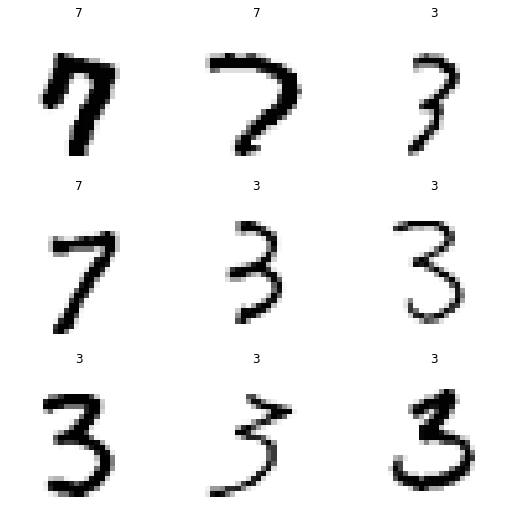

In [6]:
import torch_xla.core.xla_model as xm

tpu_device = xm.xla_device()
# Use same datablock, but load with TPU
dls_tpu = datablock.dataloaders(path, device=tpu_device)
dls_tpu.device, dls_tpu.vocab, dls_tpu.show_batch()


In [10]:
class CallbackXLA(Callback):
  def after_step(self):
    xm.optimizer_step(self.opt, barrier=True)

learnerCB = Learner(dls_tpu, Lenet2(), metrics=accuracy, opt_func=Adam, cbs=CallbackXLA)

SuggestedLRs(lr_min=0.003981071710586548, lr_steep=0.0030199517495930195)

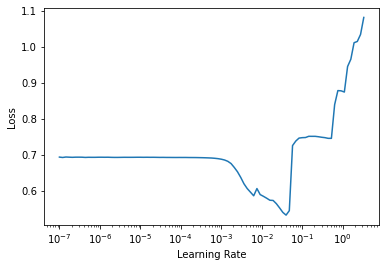

In [12]:
learnerCB.lr_find()

In [14]:
learnerCB.fit(30, 0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.698680,0.693401,0.505007,00:01
1,0.700702,0.694923,0.494993,00:01
2,0.698816,0.693575,0.494993,00:01
3,0.696992,0.694601,0.505007,00:01
4,0.697226,0.697604,0.494993,00:01
5,0.696997,0.693851,0.505007,00:01
6,0.696114,0.693440,0.505007,00:01
7,0.696650,0.701110,0.505007,00:01
8,0.698016,0.694371,0.494993,00:01
9,0.697508,0.694485,0.505007,00:01


In [ ]:
learnerCB.fit_one_cycle(30)